### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage

In [2]:
filename = 'anpn2.csv'

### Function do find the max size of columns

In [3]:
#preprocessing
def get_max_len():
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        num = []
        for i, row in enumerate(reader):
            num.append(len(row))
        m = max(num)
        #print m
        return m
    
print(get_max_len())

11


### Read and show dataset

In [4]:
df = pd.read_csv(filename, header=None, na_values=0, names=range(get_max_len()), low_memory=False)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,a1,p1,p2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a2,p5,p7,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a3,p2,p3,p4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a4,p7,p5,p8,p3,NaN,NaN,NaN,NaN,NaN,NaN
4,a5,p4,p1,p6,p9,p7,p3,NaN,NaN,NaN,NaN


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,a1,p1,p2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a2,p5,p7,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a3,p2,p3,p4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a4,p7,p5,p8,p3,NaN,NaN,NaN,NaN,NaN,NaN
4,a5,p4,p1,p6,p9,p7,p3,NaN,NaN,NaN,NaN
5,a6,p7,p3,p5,p2,NaN,NaN,NaN,NaN,NaN,NaN
6,a7,p1,p5,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,a8,p6,p3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,a9,p1,p3,p5,p6,p7,p8,p9,NaN,NaN,NaN
9,a10,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10


### Filter Dataset

In [7]:
permissions = set()
permissions_list = set()
apps_list = set()


for index, row in df.iterrows():
    app = row[0]
    
    for perm in row[1:]:
        if str(perm) == 'nan':
            break
        else:
            #perm_list = perm.split('.')
            perm_list = perm
            perm_t = perm_list.lower()
            permissions.add(perm_t)
            permissions_list.add((app, perm_t))
            apps_list.add(app)

### Create new dataframe from filter permissions and apps

In [8]:
df_apps = pd.DataFrame(list(permissions_list))
df_apps.head()
df_apps

,0,1
0,a15,p9
1,a3,p2
2,a10,p1
3,a3,p4
4,a10,p8
5,a2,p9
6,a6,p2
7,a8,p6
8,a3,p3
9,a18,p2


### Create a matrix from dataframe

In [9]:
matrix = pd.crosstab(index=df_apps[0], columns = df_apps[1])
#matrix.to_csv('permissions_matrix_anpn2.csv', index=False)

### Calculate similarity matrix (>= 16gb to run)

In [10]:
similarity_matrix = np.float32(squareform(pdist(matrix, 'cosine')))

In [12]:
similarity_matrix_pearson = np.float32(squareform(pdist(matrix, 'correlation')))

### Write similarity matrix in file (.npy)

In [33]:
np.save('sim_matrix_anpn2.npy', similarity_matrix)

In [13]:
np.savetxt("sim_matriz_anpn2.csv", similarity_matrix, delimiter=",")

In [11]:
matrix

1,p1,p10,p2,p3,p4,p5,p6,p7,p8,p9
0,,,,,,,,,,
a1,1,0,1,0,0,0,0,0,0,0
a10,1,1,1,1,1,1,1,1,1,1
a11,0,1,0,0,0,1,0,0,1,0
a12,1,0,0,1,1,0,0,1,0,1
a13,1,0,1,1,0,0,0,0,0,0
a14,0,0,0,0,1,1,1,0,0,0
a15,0,1,0,0,0,0,0,1,1,1
a16,1,0,0,1,0,1,0,1,0,0
a17,0,0,1,0,1,0,1,0,1,0


In [12]:
similarity_matrix

array([[0.        , 0.5527864 , 1.        , 0.6837722 , 0.18350342,
        1.        , 1.        , 0.6464466 , 0.6464466 , 0.36754447,
        0.46547753, 1.        , 1.        , 0.5917517 , 1.        ,
        0.7113249 , 0.6464466 , 0.5917517 , 1.        , 0.73273873],
       [0.5527864 , 0.        , 0.45227745, 0.29289323, 0.45227745,
        0.45227745, 0.36754447, 0.36754447, 0.36754447, 0.29289323,
        0.16333997, 0.45227745, 0.6837722 , 0.45227745, 0.36754447,
        0.22540332, 0.36754447, 0.45227745, 0.5527864 , 0.16333997],
       [1.        , 0.45227745, 0.        , 1.        , 1.        ,
        0.6666667 , 0.42264974, 0.7113249 , 0.7113249 , 0.7418011 ,
        0.34534633, 0.6666667 , 1.        , 1.        , 0.42264974,
        1.        , 0.7113249 , 0.6666667 , 1.        , 0.56356424],
       [0.6837722 , 0.29289323, 1.        , 0.        , 0.48360223,
        0.7418011 , 0.5527864 , 0.3291796 , 0.7763932 , 0.6       ,
        0.6619383 , 0.48360223, 0.5527864 , 0

In [13]:
sm2 = pdist(matrix, 'cosine')

In [16]:
similarity_matrix.size

400

In [16]:
similarity_matrix_pearson

array([[0.        ,        nan, 1.3273269 , 1.        , 0.23623738,
        1.3273269 , 1.4082483 , 0.89793795, 0.89793795, 0.5       ,
        0.67267317, 1.3273269 , 1.1666666 , 0.7817821 , 1.4082483 ,
        1.1020621 , 0.89793795, 0.7817821 , 1.25      , 1.2182178 ],
       [       nan, 0.        ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.3273269 ,        nan, 0.        , 1.6546537 , 1.4285715 ,
        0.95238096, 0.64365166, 1.0890871 , 1.0890871 , 1.2182178 ,
        0.5714286 , 0.95238096, 1.2182178 , 1.4285715 , 0.64365166,
        1.8017837 , 1.0890871 , 0.95238096, 1.3273269 , 1.0476191 ],
       [1.        ,        nan, 1.6546537 , 0.        , 0.7817821 ,
        1.2182178 , 1.        , 0.5917517 , 1.4082483 , 1.2       ,
        1.6546537 , 0.7817821 , 0.6666667 , 0

In [53]:
from pyclustering.cluster.kmedoids import kmedoids;
from pyclustering.cluster.agglomerative import agglomerative;
from pyclustering.cluster import cluster_visualizer;

In [54]:
# set random initial medoids
initial_medoids = [5,15]

In [55]:
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(similarity_matrix, initial_medoids, data_type='distance_matrix')

In [56]:
# run cluster analysis and obtain results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [57]:
clusters

[[5], [1, 0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

In [58]:
medoids

[5, 1]

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
#for i in range(2,21):
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'precomputed', linkage = 'complete')

In [65]:
y_hc = hc.fit(similarity_matrix)

In [66]:
y_hc

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [47]:
print(y_hc.labels_)

[1 3 4 3 1 2 4 0 2 1 1 3 0 0 0 3 0 3 0 3]


In [61]:
print(y_hc.n_clusters)

5


In [62]:
print(y_hc.n_leaves_)

20


In [40]:
from kmedoids import kmedoids

In [48]:
sm, c = kmedoids(similarity_matrix, k=5)

In [49]:
sm

array([ 2, 15,  8, 10,  7])

In [50]:
c

{0: array([2, 6]),
 1: array([ 3, 15, 18, 19]),
 2: array([ 5,  8, 13]),
 3: array([ 0,  1,  9, 10, 17]),
 4: array([ 4,  7, 11, 12, 14, 16])}

In [51]:
upper_sm = np.triu(similarity_matrix, 1)

In [52]:
upper_sm.shape

(20, 20)

In [59]:
xpto = np.array([number for list_number in upper_sm for number in list_number if number != 0])

In [60]:
xpto.shape

(190,)

In [58]:
len(xpto)

190

In [53]:
upper_sm

array([[0.        , 0.5527864 , 1.        , 0.6837722 , 0.18350342,
        1.        , 1.        , 0.6464466 , 0.6464466 , 0.36754447,
        0.46547753, 1.        , 1.        , 0.5917517 , 1.        ,
        0.7113249 , 0.6464466 , 0.5917517 , 1.        , 0.73273873],
       [0.        , 0.        , 0.45227745, 0.29289323, 0.45227745,
        0.45227745, 0.36754447, 0.36754447, 0.36754447, 0.29289323,
        0.16333997, 0.45227745, 0.6837722 , 0.45227745, 0.36754447,
        0.22540332, 0.36754447, 0.45227745, 0.5527864 , 0.16333997],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.6666667 , 0.42264974, 0.7113249 , 0.7113249 , 0.7418011 ,
        0.34534633, 0.6666667 , 1.        , 1.        , 0.42264974,
        1.        , 0.7113249 , 0.6666667 , 1.        , 0.56356424],
       [0.        , 0.        , 0.        , 0.        , 0.48360223,
        0.7418011 , 0.5527864 , 0.3291796 , 0.7763932 , 0.6       ,
        0.6619383 , 0.48360223, 0.5527864 , 0

In [39]:
sm2

array([0.5527864 , 1.        , 0.68377223, 0.18350342, 1.        ,
       1.        , 0.64644661, 0.64644661, 0.36754447, 0.46547752,
       1.        , 1.        , 0.59175171, 1.        , 0.71132487,
       0.64644661, 0.59175171, 1.        , 0.73273876, 0.45227744,
       0.29289322, 0.45227744, 0.45227744, 0.36754447, 0.36754447,
       0.36754447, 0.29289322, 0.16333997, 0.45227744, 0.68377223,
       0.45227744, 0.36754447, 0.22540333, 0.36754447, 0.45227744,
       0.5527864 , 0.16333997, 1.        , 1.        , 0.66666667,
       0.42264973, 0.71132487, 0.71132487, 0.74180111, 0.34534633,
       0.66666667, 1.        , 1.        , 0.42264973, 1.        ,
       0.71132487, 0.66666667, 1.        , 0.56356422, 0.48360222,
       0.74180111, 0.5527864 , 0.32917961, 0.7763932 , 0.6       ,
       0.6619383 , 0.48360222, 0.5527864 , 0.48360222, 0.5527864 ,
       0.08712907, 0.5527864 , 0.48360222, 0.68377223, 0.3238766 ,
       1.        , 1.        , 0.42264973, 0.71132487, 0.48360

In [61]:
Z5 = linkage(xpto, method='complete')

In [63]:
Z6 = linkage(sm2, method='complete')

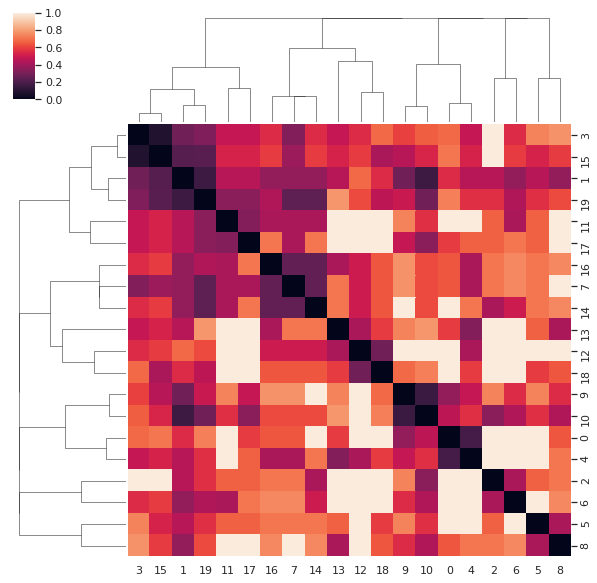

In [62]:
g = sns.clustermap(similarity_matrix, row_linkage=Z5, col_linkage=Z5)

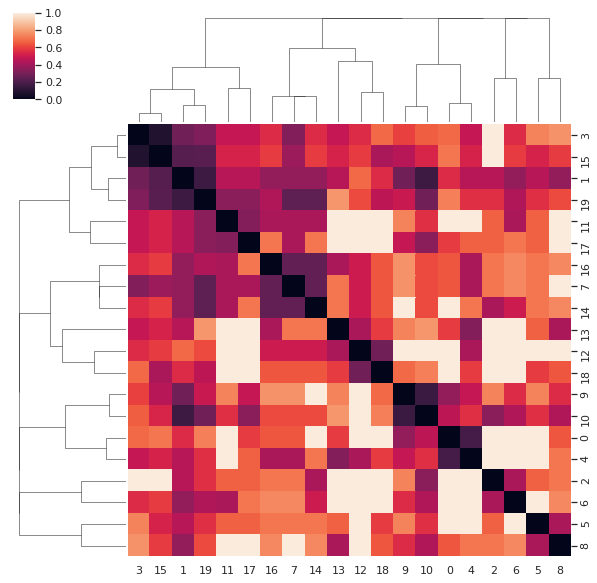

In [64]:
g = sns.clustermap(similarity_matrix, row_linkage=Z6, col_linkage=Z6)

In [47]:
sm2.shape

(190,)

In [48]:
upper_sm

array([[0.        , 0.5527864 , 1.        , 0.6837722 , 0.18350342,
        1.        , 1.        , 0.6464466 , 0.6464466 , 0.36754447,
        0.46547753, 1.        , 1.        , 0.5917517 , 1.        ,
        0.7113249 , 0.6464466 , 0.5917517 , 1.        , 0.73273873],
       [0.        , 0.        , 0.45227745, 0.29289323, 0.45227745,
        0.45227745, 0.36754447, 0.36754447, 0.36754447, 0.29289323,
        0.16333997, 0.45227745, 0.6837722 , 0.45227745, 0.36754447,
        0.22540332, 0.36754447, 0.45227745, 0.5527864 , 0.16333997],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        0.6666667 , 0.42264974, 0.7113249 , 0.7113249 , 0.7418011 ,
        0.34534633, 0.6666667 , 1.        , 1.        , 0.42264974,
        1.        , 0.7113249 , 0.6666667 , 1.        , 0.56356424],
       [0.        , 0.        , 0.        , 0.        , 0.48360223,
        0.7418011 , 0.5527864 , 0.3291796 , 0.7763932 , 0.6       ,
        0.6619383 , 0.48360223, 0.5527864 , 0

In [49]:
upper_sm.shape

(20, 20)

In [44]:
Z = complete(sm2)

In [45]:
Z

array([[ 3.        , 15.        ,  0.08712907,  2.        ],
       [ 9.        , 10.        ,  0.15484575,  2.        ],
       [ 1.        , 19.        ,  0.16333997,  2.        ],
       [ 0.        ,  4.        ,  0.18350342,  2.        ],
       [ 7.        , 14.        ,  0.25      ,  2.        ],
       [16.        , 24.        ,  0.25      ,  3.        ],
       [12.        , 18.        ,  0.29289322,  2.        ],
       [20.        , 22.        ,  0.3238766 ,  4.        ],
       [11.        , 17.        ,  0.33333333,  2.        ],
       [ 2.        ,  6.        ,  0.42264973,  2.        ],
       [ 5.        ,  8.        ,  0.42264973,  2.        ],
       [27.        , 28.        ,  0.52859548,  6.        ],
       [21.        , 23.        ,  0.56356422,  4.        ],
       [13.        , 26.        ,  0.59175171,  3.        ],
       [25.        , 33.        ,  0.71132487,  6.        ],
       [29.        , 30.        ,  1.        ,  4.        ],
       [32.        , 35.

In [21]:
import seaborn as sns; sns.set(color_codes=True)

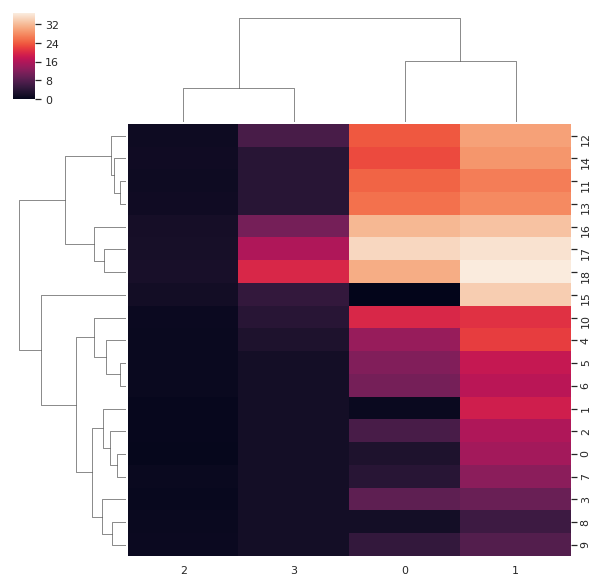

In [19]:
g = sns.clustermap(Z)

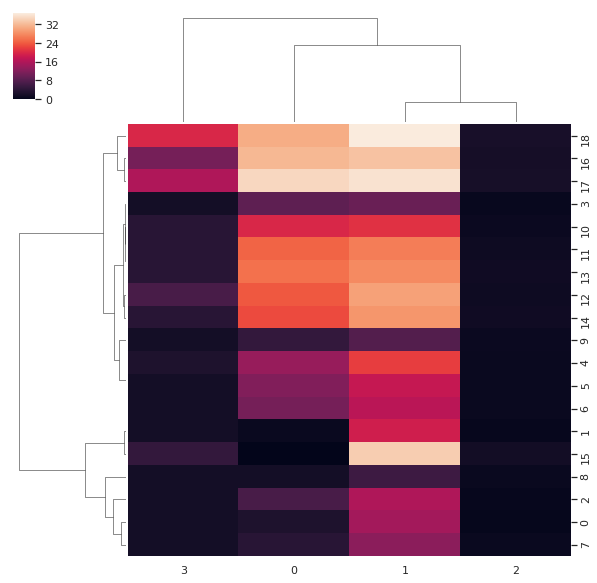

In [21]:
g = sns.clustermap(Z, metric="cosine")

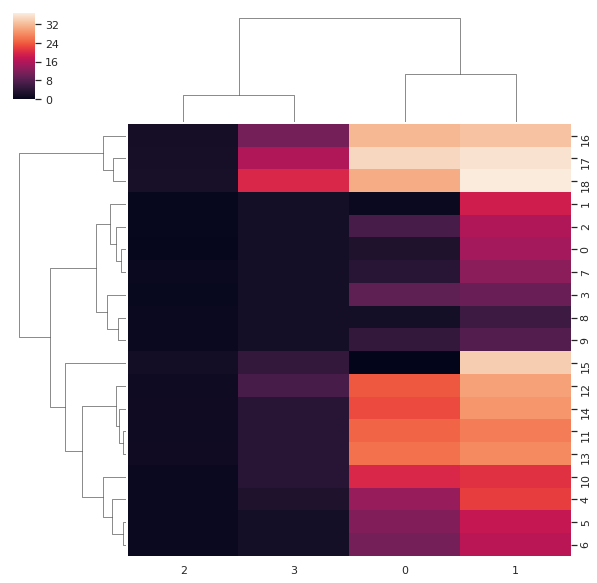

In [24]:
g = sns.clustermap(Z, method="complete")

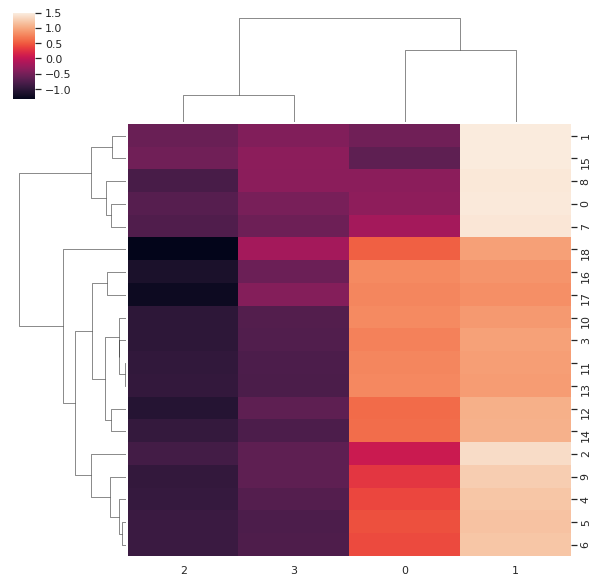

In [22]:
g = sns.clustermap(Z, z_score=0)

In [33]:
Z4 = linkage(upper_sm, method='centroid')

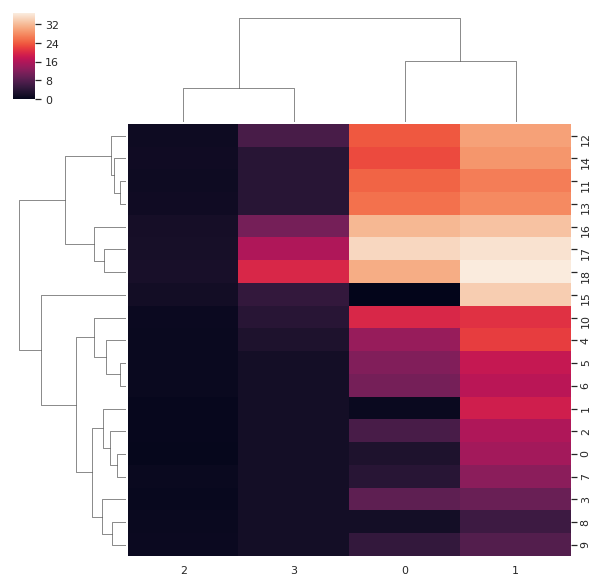

In [28]:
g = sns.clustermap(Z)

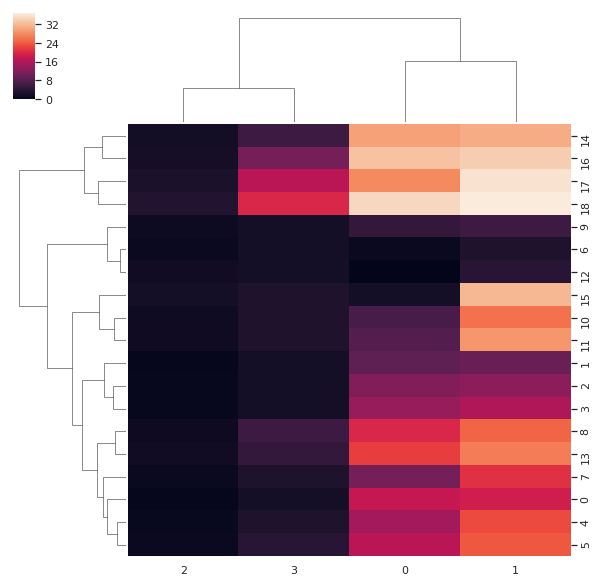

In [29]:
g = sns.clustermap(Z2)

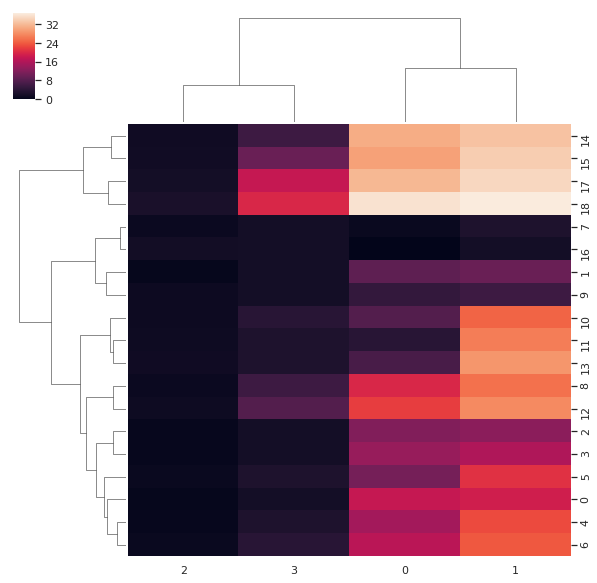

In [32]:
g = sns.clustermap(Z3)

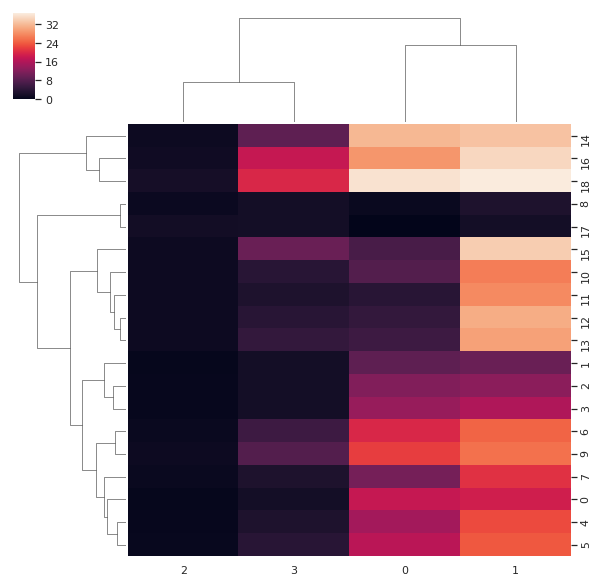

In [34]:
g = sns.clustermap(Z4)

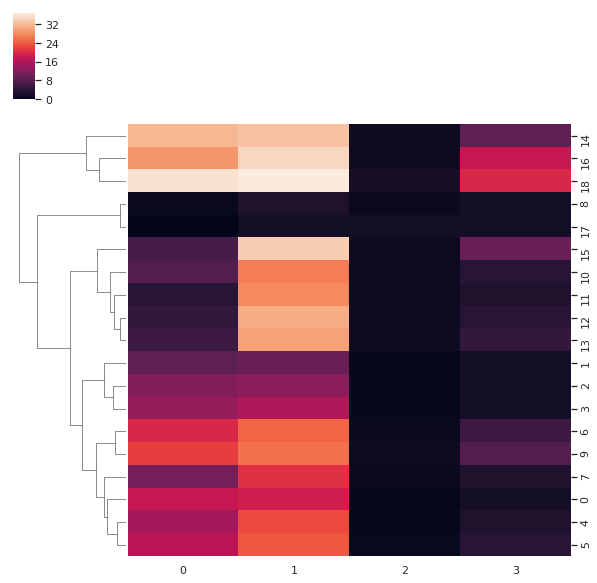

In [35]:
g = sns.clustermap(Z4, col_cluster=False)

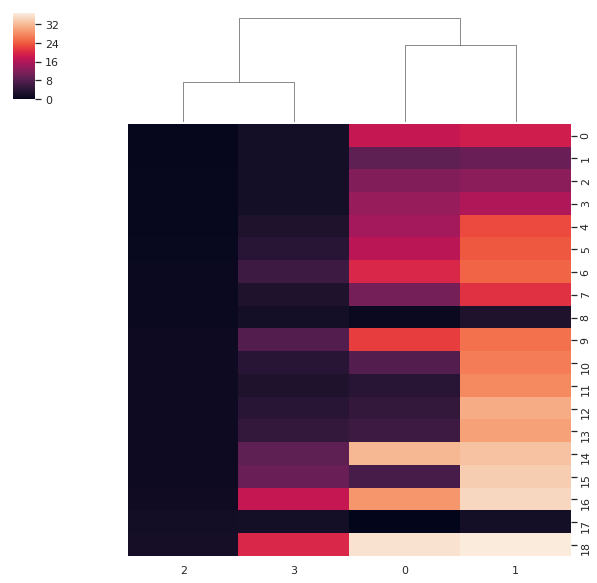

In [36]:
g = sns.clustermap(Z4, row_cluster=False)